In [1]:
# http://www.datascienceassn.org/sites/default/files/users/user1/lsa_presentation_final.pdf
# Latent Semantic Analysis (LSA) is a framework for analyzing text using matrices
# Find relationships between documents and terms within documents
# Used for document classification, clustering, text search, and more
# Lots of experts here at CU Boulder!

In [2]:
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)
import numpy

In [13]:
example = ["Machine learning is super fun",
"Python is super, super cool",
"Statistics is cool, too",
"Data science is fun",
"Python is great for machine learning",
"I like football",
           "Beer is good",
"Football is great to watch"]
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example)
pd.DataFrame(dtm.toarray(),index=example,columns=vectorizer.get_feature_names
()).head(10)

,beer,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
Machine learning is super fun,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
"Python is super, super cool",0,1,0,0,0,0,0,0,0,0,1,0,0,2,0
"Statistics is cool, too",0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
Data science is fun,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
Python is great for machine learning,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0
I like football,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
Beer is good,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Football is great to watch,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [14]:
# Each row represents a document. Each column represents a word. So each document is a 13-dim vector.
# Each entry equals the number of times the word appears in the document
# Note: order and proximity of words in documents is NOT accounted for. Called a "bag of words" representation

# Get words that correspond to each column
vectorizer.get_feature_names()

['beer',
 'cool',
 'data',
 'football',
 'fun',
 'good',
 'great',
 'learning',
 'like',
 'machine',
 'python',
 'science',
 'statistics',
 'super',
 'watch']

In [15]:
# Example: "machine" appears once in the first document, "super" appears twice in the second document, and "statistics" appears zero times in the third document.

# Fit LSA. Use algorithm = “randomized” for large datasets
#lsa = TruncatedSVD(2, algorithm = 'arpack')
lsa = TruncatedSVD(2)
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [16]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

,beer,cool,data,football,fun,good,great,learning,like,machine,python,science,statistics,super,watch
component_1,1.948809e-16,0.280004,0.035353,0.033417,0.223993,1.709452e-16,0.178307,0.338085,0.004555,0.338085,0.391281,0.035353,0.038169,0.672310,0.028861
component_2,1.011060e-16,0.365270,-0.064548,-0.298349,-0.168056,1.872941e-16,-0.478428,-0.366379,-0.082792,-0.366379,0.001036,-0.064548,0.101363,0.424306,-0.215557


In [17]:
pd.DataFrame(dtm_lsa, index = example, columns = ["component_1","component_2"
])

,component_1,component_2
Machine learning is super fun,0.957024,-0.290007
"Python is super, super cool",0.856484,0.516174
"Statistics is cool, too",0.563355,0.826215
Data science is fun,0.704171,-0.710030
Python is great for machine learning,0.717284,-0.696781
I like football,0.099136,-0.995074
Beer is good,0.818809,0.574066
Football is great to watch,0.235618,-0.971846


In [18]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9570243939303802,
  0.8564837097375548,
  0.5633548915563883,
  0.7041710879980199,
  0.7172839034551725,
  0.09913638842634111,
  0.8188087153382988,
  0.23561831047045315],
 [-0.29000742994307654,
  0.5161740549022161,
  0.8262150241671292,
  -0.710030336554492,
  -0.6967810286195447,
  -0.9950738547915836,
  0.5740664488419828,
  -0.9718456728159307])

Populating the interactive namespace from numpy and matplotlib


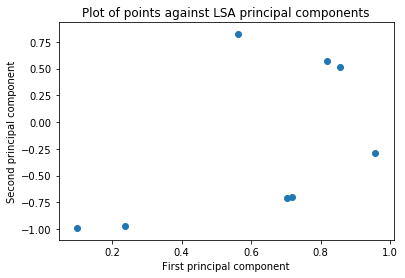

In [19]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


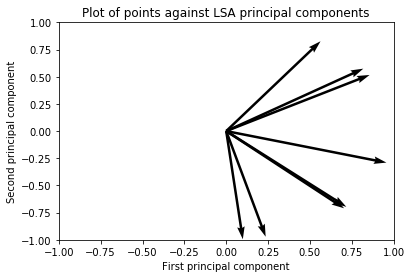

In [20]:
# Geometric picture
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()
# We have reduced dimension from 13-dim to 2-dim (and have lost some info)
# Similar docs point in similar directions. Dissimilar docs have perpendicular (orthogonal) vectors. "Cosine
# similarity"
# Can use cosine similarity for search: which doc has the smallest angle with search term?

In [21]:
# Document similarity using LSA
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=example, columns=example).head(10)

,Machine learning is super fun,"Python is super, super cool","Statistics is cool, too",Data science is fun,Python is great for machine learning,I like football,Beer is good,Football is great to watch
Machine learning is super fun,1.000000,0.669981,0.299536,0.879823,0.888530,0.383455,0.617136,0.507335
"Python is super, super cool",0.669981,1.000000,0.908975,0.236612,0.254682,-0.428723,0.997615,-0.299838
"Statistics is cool, too",0.299536,0.908975,1.000000,-0.189940,-0.171606,-0.766296,0.935582,-0.670217
Data science is fun,0.879823,0.236612,-0.189940,1.000000,0.999826,0.776342,0.168977,0.855956
Python is great for machine learning,0.888530,0.254682,-0.171606,0.999826,1.000000,0.764458,0.187320,0.846169
I like football,0.383455,-0.428723,-0.766296,0.776342,0.764458,1.000000,-0.490065,0.990417
Beer is good,0.617136,0.997615,0.935582,0.168977,0.187320,-0.490065,1.000000,-0.364978
Football is great to watch,0.507335,-0.299838,-0.670217,0.855956,0.846169,0.990417,-0.364978,1.000000


In [22]:
# Improvements and next steps:
# Vectorize with TFIDF (term-frequency inverse document-frequency: uses overall frequency of words to weight document-term matrix)
